In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [64]:
data = pd.read_csv('https://raw.githubusercontent.com/TTonsss/DSSS/main/data.csv')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               108 non-null    object 
 1   House_price        108 non-null    int64  
 2   Population         108 non-null    int64  
 3   dwelling           108 non-null    int64  
 4   GDP(m)             108 non-null    int64  
 5   dwelling stock     108 non-null    int64  
 6   mortgage_rate      108 non-null    float64
 7   unemployment_rate  108 non-null    float64
 8   Real_income        108 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 7.7+ KB


In [66]:
data.head()

,Year,House_price,Population,dwelling,GDP(m),dwelling stock,mortgage_rate,unemployment_rate,Real_income
0,Q1 1994,51327,57862100,20139,317468,3666190,5.13,9.9,208676
1,Q2 1994,51362,57862100,20139,321166,3666190,5.33,9.7,208365
2,Q3 1994,51731,57862100,20139,324811,3666190,5.63,9.4,212502
3,Q4 1994,52114,57862100,20139,326734,3666190,6.13,9.0,211454
4,Q1 1995,51084,58024800,20305,328056,3564590,6.63,8.9,215037


In [67]:
data = data.rename(columns={'House_price': 'price','Population': 'population', 'GDP(m)': 'GDP', 'dwelling stock': 'dwelling_stock'})
data.tail()

,Year,price,population,dwelling,GDP,dwelling_stock,mortgage_rate,unemployment_rate,Real_income
103,Q4 2019,215925,66796800,24414,544733,1587164,4.27,3.8,370990
104,Q1 2020,217911,67886011,15950,529223,1583068,4.10,4.0,365330
105,Q2 2020,220133,67886011,15950,426197,1583068,3.65,4.1,353774
106,Q3 2020,224337,67886011,15950,498429,1583068,3.65,4.8,367916
107,Q4 2020,229819,67886011,15950,504742,1583068,3.62,5.1,370173


Text(0.5, 0, 'House price')

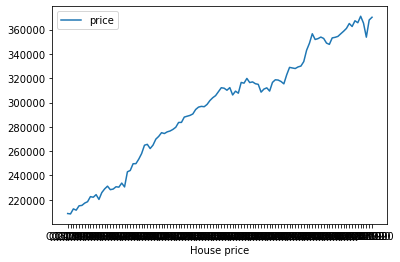

In [68]:
x=data['Year']
y0=data['price']
y1=data['population']
y2=data['dwelling']
y3=data['GDP']
y4=data['dwelling_stock']
y5=data['mortgage_rate']
y6=data['unemployment_rate']
y7=data['Real_income']



plt.plot(x, y7,label='price')

plt.legend()
plt.xlabel('House price')


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               108 non-null    object 
 1   price              108 non-null    int64  
 2   population         108 non-null    int64  
 3   dwelling           108 non-null    int64  
 4   GDP                108 non-null    int64  
 5   dwelling_stock     108 non-null    int64  
 6   mortgage_rate      108 non-null    float64
 7   unemployment_rate  108 non-null    float64
 8   Real_income        108 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 7.7+ KB


In [70]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
Year,0,0.0
price,0,0.0
population,0,0.0
dwelling,0,0.0
GDP,0,0.0
dwelling_stock,0,0.0
mortgage_rate,0,0.0
unemployment_rate,0,0.0
Real_income,0,0.0


In [71]:
data.isnull().sum().max()

0

### Correlation

Text(0.5, 1.0, 'Correlation Matrix')

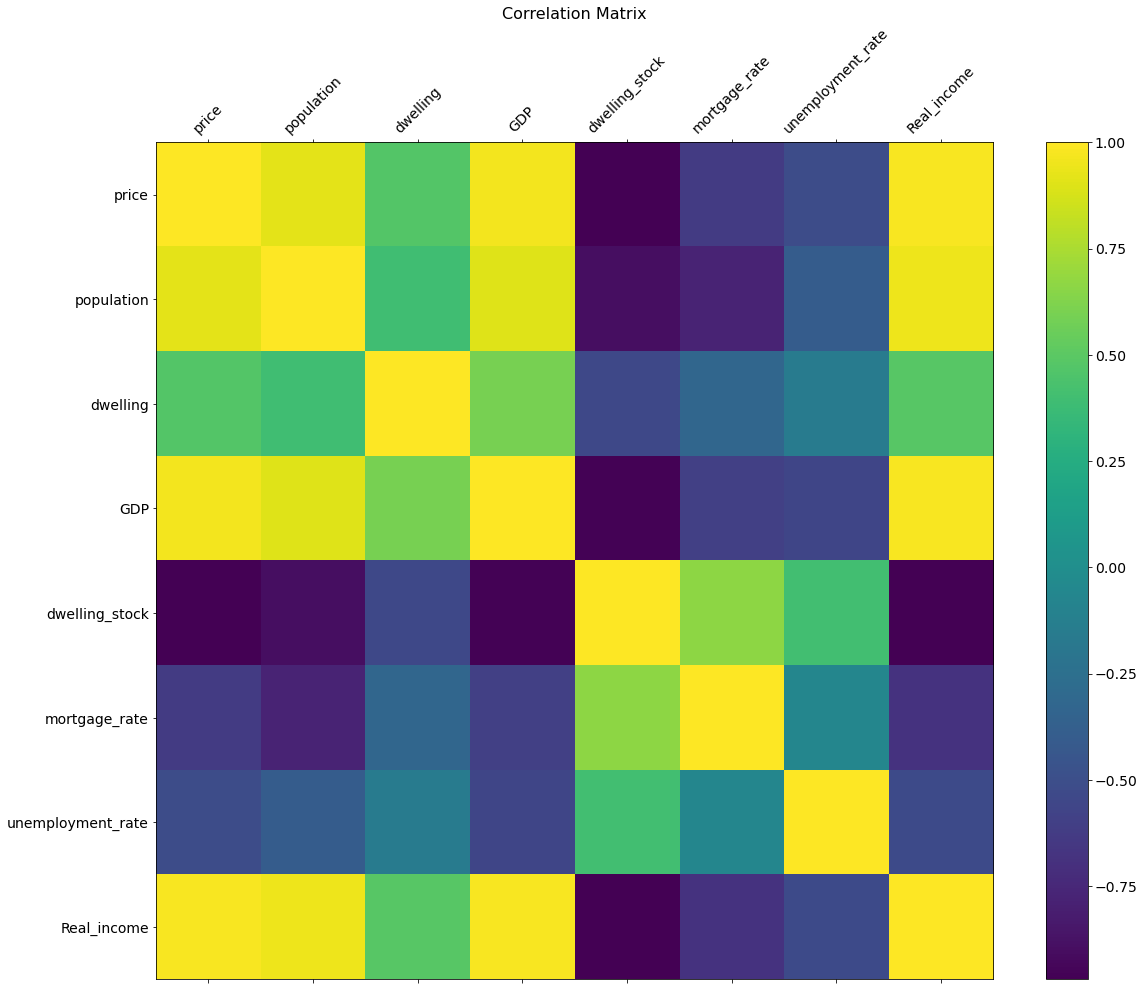

In [107]:
data = data.drop(['Year'],axis = 1)
df = data
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### Stepwise regression

In [111]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [112]:
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [113]:
predictors_data = data.drop(columns=['price'], axis=1)
response_data = data['price']

In [130]:
list_predictor_select_stepwise = stepwise_selection(X=predictors_data, y=response_data,initial_list=[], 
                           threshold_in=0.03, 
                           threshold_out = 0.05, 
                           verbose=True)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

Add  Real_income                    with p-value 7.91535e-78
Add  dwelling_stock                 with p-value 5.53285e-06
Add  mortgage_rate                  with p-value 0.000182488
Add  dwelling                       with p-value 0.012535
The predictors that are selected by stepwise regression are:
['Real_income', 'dwelling_stock', 'mortgage_rate', 'dwelling']


<ipython-input-112-eca5eaf6445f>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-112-eca5eaf6445f>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-112-eca5eaf6445f>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-112-eca5eaf6445f>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-112-eca5eaf6445f>

In [131]:
multi_regression_model_1 = smf.ols(formula='price ~ Real_income+dwelling_stock+mortgage_rate+dwelling',data=data).fit()
print(multi_regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1011.
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           1.14e-81
Time:                        07:37:36   Log-Likelihood:                -1135.5
No. Observations:                 108   AIC:                             2281.
Df Residuals:                     103   BIC:                             2294.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.895e+04   3.86e+04     -0.

### VIF

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def calculate_vif_(df, thresh=40):
    '''
    Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i) 
               for i in range(const.shape[1])], 
              index=const.columns).to_frame()

    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    print ('Features above VIF threshold:\n')
    print (vif_df[vif_df['VIF'] > thresh])

    col_to_drop = list(vif_df.index)

    for i in col_to_drop:
        print ('Dropping: {}'.format(i))
        df = df.drop(columns=i)

    return df

In [137]:
df_predictors_select_VIF = calculate_vif_(predictors_data)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)


Features above VIF threshold:

                    VIF
Real_income  115.860356
GDP           66.703567
Dropping: Real_income
Dropping: GDP
The columns remaining after VIF selection are:
Index(['population', 'dwelling', 'dwelling_stock', 'mortgage_rate',
       'unemployment_rate'],
      dtype='object')


In [139]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF, y=response_data)

LinearRegression()

In [152]:
print("Interception: " + str(lr.intercept_) + "\n")

df_coef_lr_VIF = pd.DataFrame({"var": df_predictors_select_VIF.columns.values, "coef": lr.coef_})
print(df_coef_lr_VIF)

print("\nLinear regression score: " + str(lr.score(df_predictors_select_VIF,response_data)))

Interception: -63249.4908202003

                 var         coef
0         population     0.005831
1           dwelling    -1.109929
2     dwelling_stock    -0.056669
3      mortgage_rate  3843.024242
4  unemployment_rate -3538.095479

Linear regression score: 0.972831987096952


In [153]:
regressor_OLS = sm.OLS(endog=response_data, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     730.5
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           3.74e-78
Time:                        07:55:34   Log-Likelihood:                -1140.4
No. Observations:                 108   AIC:                             2293.
Df Residuals:                     102   BIC:                             2309.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.325e+04   7.24e+04     -0.874      0.384   -2.07e+05    8.03e+04
population            0.0058      0.001      6.508      0.000       0.004       0.008
dwelling             -1.1099      0.662     -1.677      0.097      -2.423       0.203
dwelling_stock       -0.0567      0.003    -17.546      0.000      -0.063      -0.050
mortgage_rate      3843.0242   1480.725      2.595      0.011     906.013    6780.035
unemployment_rate -3538.0955    851.132     -4.157      0.000   -5226.312   -1849.879
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.311
Skew:                           0.007   Prob(JB):                        0.856
Kurtosis:                       2.738   Cond. No.                     4.86e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Lasso

In [220]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(max_iter=10e8, tol=0.01, normalize=True)
lasso_model.fit(X=predictors_data, y=response_data)

Lasso(max_iter=1000000000.0, normalize=True, tol=0.01)

In [221]:
lasso_model.score(X=predictors_data, y=response_data)

0.9758363789651879

In [222]:
df_coef_lasso = pd.DataFrame({"var": predictors_data.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                 var         coef
0         population     0.002060
1           dwelling    -2.445227
2                GDP     0.174455
3     dwelling_stock    -0.037045
4      mortgage_rate  3214.659079
5  unemployment_rate  -729.029853
6        Real_income     0.357165


C:\Users\gavin\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1615473214.2092285, tolerance: 253191070.7529
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gavin\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2341295681.5967674, tolerance: 253191070.7529
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gavin\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3727371422.7055373, tolerance: 253191070.7529
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gavin\anaconda3\envs\python\lib\site-packages\sklearn\l

(-1.3, 5.3, -29677.255216496535, 23350.672933692364)

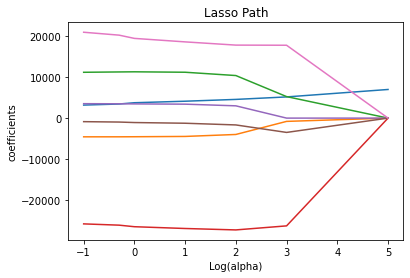

In [223]:
from itertools import cycle
from sklearn.linear_model import lasso_path
predictors_data_standardised = predictors_data/predictors_data.std(axis=0)
alphas_lasso, coefs_lasso, _ = lasso_path(predictors_data_standardised, response_data.values.reshape(-2),alphas = [.1, .5, 1, 10, 100, 1000, 100000], fit_intercept=False)
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
     ll = plt.plot(log_alphas_lasso, coef_l)
plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

In [224]:
predictors_data_new = predictors_data.drop(['Real_income','GDP'], axis=1)
lasso_model.fit(X=predictors_data_new, y=response_data)

Lasso(max_iter=1000000000.0, normalize=True, tol=0.01)

In [225]:
lasso_model.score(X=predictors_data_new, y=response_data)

0.9728263117922002

In [226]:
df_coef_lasso = pd.DataFrame({"var": predictors_data_new.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                 var         coef
0         population     0.005945
1           dwelling    -1.081849
2     dwelling_stock    -0.056522
3      mortgage_rate  4012.459828
4  unemployment_rate -3454.756737


(-1.45, 8.45, -45356.12256812138, 18588.460376394825)

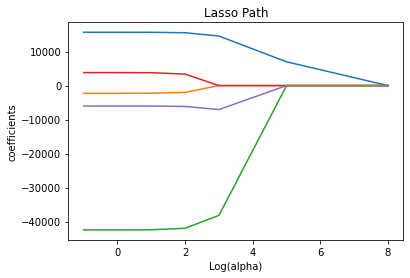

In [227]:
from itertools import cycle
from sklearn.linear_model import lasso_path
predictors_data_standardised = predictors_data_new/predictors_data_new.std(axis=0)
alphas_lasso, coefs_lasso, _ = lasso_path(predictors_data_standardised, response_data.values.reshape(-2),alphas = [.1, .5, 1, 10, 100, 1000, 100000, 100000000], fit_intercept=False)
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
     ll = plt.plot(log_alphas_lasso, coef_l)
plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

### Setting up the train, dev and test data

In [73]:
X = data.drop(['price','Year'], axis=1)
y = data['price']

In [74]:
X.shape

(108, 7)

In [75]:
y.shape

(108,)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2020)

In [77]:
X_train.shape

(75, 7)

In [78]:
X_val.shape

(16, 7)

In [79]:
X_test.shape

(17, 7)

### Linear regression

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [81]:
lr.score(X_train, y_train)

0.9773528518312739

In [82]:
lr.score(X_val, y_val)

0.8287513265753242

### Regression Tree

In [228]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(predictors_data, response_data)

DecisionTreeRegressor(random_state=0)

In [229]:
reg_tree.score(X=predictors_data, y=response_data)

1.0

In [230]:
data.describe(include=[np.number])

,price,population,dwelling,GDP,dwelling_stock,mortgage_rate,unemployment_rate,Real_income
count,108.000000,1.080000e+02,108.000000,108.000000,1.080000e+02,108.000000,108.000000,108.000000
mean,142290.990741,6.183294e+07,21955.703704,444730.074074,2.296837e+06,5.490185,6.099074,295790.935185
std,56804.657450,3.093832e+06,1717.373017,63940.667671,7.241507e+05,1.273513,1.547533,47827.254735
min,50930.000000,5.786210e+07,15950.000000,317468.000000,1.583068e+06,3.620000,3.800000,208365.000000
25%,81521.500000,5.888610e+07,20927.000000,396169.500000,1.668683e+06,4.290000,4.975000,261115.250000
50%,162247.500000,6.131910e+07,22073.000000,459800.500000,1.987343e+06,5.545000,5.500000,306959.500000
75%,184734.250000,6.459680e+07,23236.000000,491801.500000,3.011995e+06,6.622500,7.800000,329007.750000
max,229819.000000,6.788601e+07,24414.000000,544733.000000,3.666190e+06,7.740000,9.900000,370990.000000


In [231]:
ave=np.mean(data['price'])
ave

142290.99074074073

In [233]:
a=pd.DataFrame({'over_mean':data['price']>=ave})
a

,over_mean
0,False
1,False
2,False
3,False
4,False
...,...
103,True
104,True
105,True
106,True


In [235]:
b = pd.concat( [data , a], axis=1 )
b

,price,population,dwelling,GDP,dwelling_stock,mortgage_rate,unemployment_rate,Real_income,over_mean
0,51327,57862100,20139,317468,3666190,5.13,9.9,208676,False
1,51362,57862100,20139,321166,3666190,5.33,9.7,208365,False
2,51731,57862100,20139,324811,3666190,5.63,9.4,212502,False
3,52114,57862100,20139,326734,3666190,6.13,9.0,211454,False
4,51084,58024800,20305,328056,3564590,6.63,8.9,215037,False
...,...,...,...,...,...,...,...,...,...
103,215925,66796800,24414,544733,1587164,4.27,3.8,370990,True
104,217911,67886011,15950,529223,1583068,4.10,4.0,365330,True
105,220133,67886011,15950,426197,1583068,3.65,4.1,353774,True
106,224337,67886011,15950,498429,1583068,3.65,4.8,367916,True


In [236]:
A = b.drop(['over_mean','price'], axis=1)
y = b['over_mean']

In [237]:
b['over_mean'].value_counts()

True     67
False    41
Name: over_mean, dtype: int64

In [238]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([True,False])
labels_fea = le.transform(b['over_mean'])

### Random forest

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [84]:
rf.score(X_train, y_train)

0.9993519107364807

In [85]:
rf.score(X_val, y_val)

0.9376622637707264